<a href="https://colab.research.google.com/github/mahesh2301/MaheshSharma/blob/main/Project_3_SSSIHL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.datasets import load_breast_cancer
>>> df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
>>> df['y'] = load_breast_cancer()['target']

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = df.drop(columns=['y'])#independent variable
y = df['y']#dependnet or target value
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

Train Confusion matrix


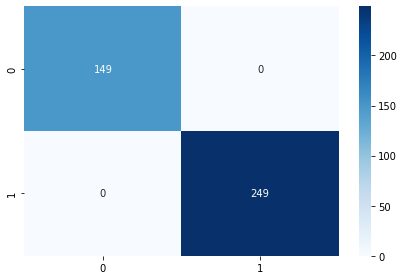

Test Confusion matrix


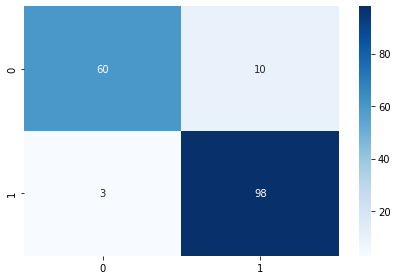

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.9239766081871345


In [ ]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
print(df)
print("")

   max_depth   accuracy
0        1.0  89.473684
1        2.0  93.567251
2        3.0  94.736842
3        4.0  94.152047
4        5.0  93.567251
5        6.0  92.397661
6        7.0  92.397661
7        8.0  91.812865
8        9.0  92.397661
9       10.0  90.058480



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        70
           1       0.91      0.97      0.94       101

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
predictions = rf.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.09 degrees.


## K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_breast_cancer
>>> df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
>>> df['y'] = load_breast_cancer()['target']

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
import numpy as np
from sklearn import cluster

n_clusters = 2

k_means = cluster.KMeans(n_clusters=n_clusters)
k_means.fit(df)
values = k_means.cluster_centers_
label = k_means.labels_

print(values)
print(label)

[[1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02 7.63358779e-03]
 [1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02 8.12785388e-01]]
[0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 

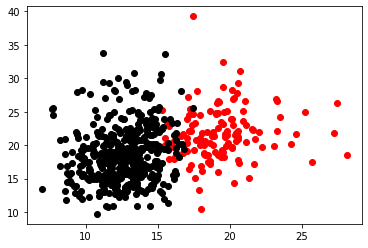

In [ ]:
#filter rows of original data
filtered_label0 = df[label == 0].values
 
filtered_label1 = df[label == 1].values

#filtered_label2 = df[label == 2].values
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
#plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.show()

## Gradient Boosting Method

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3, random_state=0)net

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.962
Accuracy score (validation): 0.936
Learning rate:  0.1
Accuracy score (training): 0.965
Accuracy score (validation): 0.930
Learning rate:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.936
Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.936
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.953
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.959
